# Entrance Length Estimation for Channel Flow



**Prepared by**: Stephen Cini (scini@nd.edu) and David Gazzo (dgazzo@nd.edu)

>

**Editted by** Farbod Shirinichi (fshirini@nd.edu)

# Introduction

Estimating the entrance length of channel flow is a fundamental concept in fluid dynamics, with wide-ranging applications in various engineering and scientific disciplines. The entrance length, often referred to as the hydrodynamic entrance region, represents the distance over which a fluid undergoes a transition from a disturbed, uneven flow pattern to a more uniform, steady-state flow within a conduit or channel. Accurate estimation of this entrance length is crucial for optimizing the design and performance of fluid transport systems, whether in pipelines, heat exchangers, or microfluidic devices. Understanding and characterizing the entrance length is essential for predicting pressure drops, flow profiles, and heat transfer rates, thereby ensuring efficient and cost-effective operation in a multitude of engineering applications.[1][2]


The study of entrance length has been a topic of great interest to fluid dynamicists and engineers for many decades, as it provides critical insights into the behavior of fluid near the entry of a channel. The phenomena associated with entrance length have significant implications for industrial processes, energy systems, and transportation of fluids. By comprehending the factors that influence entrance length, researchers and engineers can make informed decisions about channel design, fluid transport efficiency, and the mitigation of undesired effects like turbulence and heat loss. [1][2]





**Intended Audience**: This problem is designed for junior and senior students majoring in Chemical and Biomolecular Engineering at the University of Notre Dame, specifically those who are currently enrolled in or have completed the Transport course and have a keen interest any student who has an interest in fluid dynamics.

## Learning Objectives


AUpon completing this notebook and actively participating in class discussions and activities, you should be able to:

* Apply Python-based integration techniques to solve ordinary differential equations effectively.
* Demonstrate proficiency in creating and visualizing data using `matplotlib.` for effective data representation.
* Apply integration techniques to real-world scenarios, including entrance length flow in Channel Flow in different Systems.
* Solving an example of real use of calculating the the entrance length
* be able to adapt these skills to similar problems with only minor formula adjustments, showcasing your problem-solving versatility.

## Coding Resources

Relevant Modules in Class Website:



*   [Functions and Scope](https://ndcbe.github.io/data-and-computing/notebooks/01/Functions-and-Scope.html)
*   [Visualization with matplotlib](https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html)
*   [Lambda Functions](https://ndcbe.github.io/data-and-computing/notebooks/01/Functions-as-Arguments.html#lambda-functions)
*   [Preparing Publication Quality Figures in Python](https://ndcbe.github.io/data-and-computing/notebooks/01/Publication-Quality-Figures.html)
*   [Scipy](https://ndcbe.github.io/data-and-computing/notebooks/07/Systems-of-Differential-Equations-and-Scipy.html#scipy)













In [9]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

## Problem Statement:

<div class="admonition seealso">
<p class="title"><b>Homework Problem</b></p>
 Complete the following problem outside of class to practice the concepts discussed.
</div>

In this notebook, we delve into the concept of estimating the entrance length for flow in a rectangular channel, particularly when the channel's width "w" significantly exceeds its height "H," as shown in the figure below.

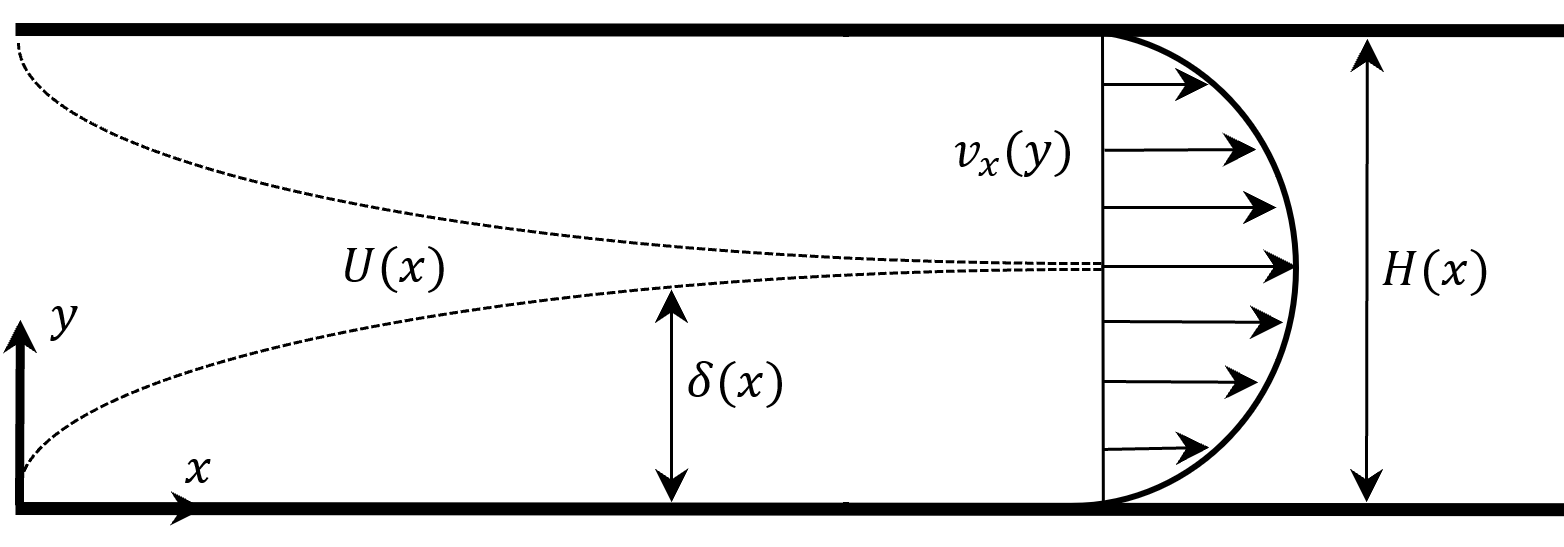


The velocity field within the channel's entrance depends on both the x and y directions, creating a boundary layer as the fluid enters. The lecture focuses on the crucial point when the boundary layer grows to half the channel's height, H/2, marking the transition to fully developed flow.

It's important to note that we assume the "no slip condition" throughout, where the fluid's velocity at the channel walls is zero, a fundamental concept in fluid mechanics.

Additionally, the formulae provided here are only valid for laminar flow.

The goal of this notebook is to offer a foundational understanding of entrance length in channel flow, its relevance in different systems, and the limitations of applying experimental formulae to broader fluid dynamics scenarios.

## 1. Estimating Entrance Length

As a first approximation, assume that the boundary layer is described by the results for flow over a flat plate. That is, the development of the boundary layer $δ$ is given by
\begin{equation}
δ(x)=5.00xRe_x^{-1/2}
\end{equation}

where,
\begin{equation}
 Re_x=ρUx/μ
\end{equation}

Develop an expression for the entrance length in terms of the channels Reynolds number, $Re_x=2ρUH/μ = 2ρQ/wμ$, where $〈v〉$ is the average velocity in the channel.

Show that the entrance length $Le$ is equal to $0.005ReH$.
\begin{equation}
Le=0.005ReH
\end{equation}
where
\begin{equation}
 Re_x<2000
\end{equation}


Submit your answer and written work via **Gradescope**.

It is worth mentioning that
\begin{equation}
Le=4.4Re^{1/6}H
\end{equation}
or
\begin{equation}
Le=10ReH
\end{equation}
where
\begin{equation}
 Re_x> 3500
\end{equation}



## 2. More Accurate/Rigorous Method

### 2a. Normalize the expression on paper

The analysis in Question 1 assumes that $U(x) = U_o = 〈v〉$. But in fact, the free-stream velocity changes as the boundary layer grows in the channel. Therefore, assuming a linear velocity profile, $v_x=\frac{U_xy}{δ}$, in the boundary layer, and utilizing the von Karman momentum integral equation,

\begin{equation}
τ_w=ρ \frac{∂}{∂x} ∫_0^∞v_x (U-v_x )dy+ρ\frac{∂U}{∂x} ∫_0^∞(U-v_x )dy
\end{equation}

and the fact that the flow rate $Q$ is constant, the following expression for the growth of the boundary layer can be derived:

\begin{equation}
\frac{dδ_{(x)}}{dx}=\frac{6μW}{ρδ_{(x)}Q}\frac{[H-δ_{(x)}]^2}{H+4δ_{(x)}}
\end{equation}

Manipulate this expression so that it can be integrated numerically. Hint: normalize it and keep symmetry in mind.

Submit your answer and written work via **Gradescope**.

### 2b. Numerically integrate the normalized expression

Using the normalized form of the differential equation, use `scipy.integrate.solve_ivp` to numerically integrate the expression and find the value of x where $δ$ is fully developed.

For more information on how to use `scipy.integrate`, click [here](https://ndcbe.github.io/data-and-computing/notebooks/07/Systems-of-Differential-Equations-and-Scipy.html#scipy) to go to the relevant section of the class website.

In [10]:
def entrance(d, x, Re = 1):
    '''Solving for the entrance length of the tube with non constant velocity
    Args:
        d: δ_star; Normalized δ; partial derivative wrt x or y (numpy array)
        x: x_star; Normalized x; position along channel (numpy array)
        Re: Reynolds number, constant dimensionless quantity used to show
        turbulence or roughness of flow. Set to unity as default value (float)
    Returns:
        dxdy: Normalized expression for the entrance length
        '''

    # assume Re is at unity for the example

### BEGIN SOLUTION
    dxdy = (Re*d/6)*((1+(2*d))/(2-d)**2)
### END SOLUTION

    return dxdy

In [11]:
# Integrate the solution in scipy using defined function

### BEGIN SOLUTION
dspan = [0, 1] # since del is dimensionless it will range from 0 to 1
  # where del of 0 is at the entrance of the tube and at a del of 1 is the
  # begining of fully developed flow

n = 300 # number of steps in linspace
tspan = np.linspace(0, 1, n)
xo = [0] # we're starting at the entrance of the tube

# Solve using scipy.integrate.solve_ivp
soln = integrate.solve_ivp(entrance, dspan, xo, t_eval= tspan)
d = soln.t
x = soln.y[0]
### END SOLUTION

### 2c. Plot the results
Plot the resulting data to show the behavior of the integrated expression.

For more information on how to use `matplotlib` to make publication quality plots, click [here](https://ndcbe.github.io/data-and-computing/notebooks/01/Publication-Quality-Figures.html#preparing-publication-quality-figures-in-python) to go to the relevant section of the class website.

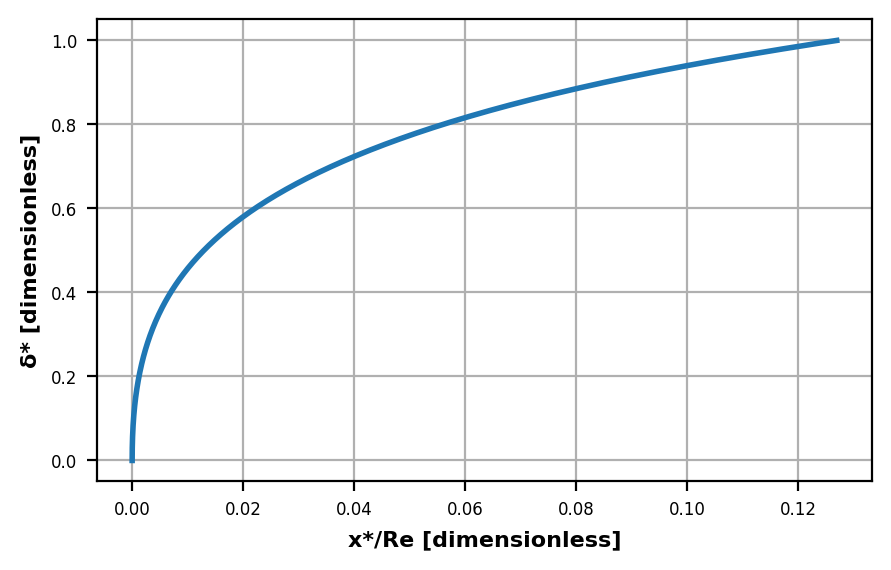

In [12]:
# Plot the integrated expression

fig = plt.figure(figsize=(5,3),dpi=200) # formats the plotted figure

### BEGIN SOLUTION
plt.plot(x, d, linewidth=2)
### END SOLUTION

# Format for publication quality
plt.xlabel('x*/Re [dimensionless]', fontsize=8,fontweight='bold')
plt.ylabel('\u03B4* [dimensionless]', fontsize=8,fontweight='bold')
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.grid()

### 2d. Define the entrance length

At what value of x does the boundary layer become fully developed?

Hint: What is the coordinate where $δ$ = 1?

Store your solution as a numpy array labelled `Le`.

In [13]:
### BEGIN SOLUTION
Le = np.array(x[-1])
### END SOLUTION

# Print Value
print("Le (x @ δ*=1) =", Le) # we want to know the dimensionless
  # length at which del is 1 since this will give us our entrance length where
  # flow is stil developing

Le (x @ δ*=1) = 0.12694690354738747


### 2e. Define an equation for Le using new value

Using the obtained value of `Le`, make a general expression for the entrance length similar to the expression derived in part 1.

*Hint*: The value obtained for Le is dimensionless.

Submit your answer and written work via **Gradescope**.

### 2f. Comparing integration methods

Compare your previous results using the `RK45` integration method with alternative methods.

Define your equation as `methods`.

For more information on other integration methods for `scipy.integrate`, click [here](https://ndcbe.github.io/data-and-computing/notebooks/07/Systems-of-Differential-Equations-and-Scipy.html) to go to the relevant section of the class website. Further detail into integration methods for `scipy.integrate`, is also provided in the documentation [here](https://docs.scipy.org/doc/scipy/reference/integrate.html).

In [14]:
# make a list of methods
methods = ["RK23", "RK45", "DOP853"]

# loop through methods for best
for i in methods:
    print("Using method",i)

### BEGIN SOLUTION
    other_methods = integrate.solve_ivp(entrance, dspan, xo, method=i, t_eval= tspan)
    d1 = other_methods.t
    x1 = other_methods.y[0]
    Le = np.array(x1[-1])
### END SOLUTION

# print values for each method within loop
# some solver statistics
    print("Number of RHS function evaluations:",other_methods.nfev)
# calculated length from each method
    print("Le (x @ δ*=1) =", Le) # dimensionless
    print("\n")

Using method RK23
Number of RHS function evaluations: 53
Le (x @ δ*=1) = 0.12693195882302588


Using method RK45
Number of RHS function evaluations: 38
Le (x @ δ*=1) = 0.12694690354738747


Using method DOP853
Number of RHS function evaluations: 89
Le (x @ δ*=1) = 0.12694710642481696




## 3. Discussion and Analysis

### 3a.  Explain why the equation derived in Question 2e differs from the one obtained in Question 1.
**Discuss** in 1-3 sentences.

**Answer**:Question 2 shifts away from the assumption of a constant and uniform fluid velocity upon entering the channel. Instead, it considers the variable nature of this velocity across the entrance, influencing the way flow is analyzed. As a consequence, the initial flow condition changes over the developing region, leading to an extended entrance length.

### 3b.  Describe the integration methods used in 2f and how they differ in performance. Was the best method used originally in 2b? Why or why not?


**Discuss** in 3-5 sentences.

**Answer**:In Question 2f, we compared three numerical integration methods: RK23, RK45, and DOP853, ranked by their error levels. RK45 provides similar precision to DOP853 but with fewer iterations. Thus, our choice to use the default scipy.integrate_ivp method was valid.

### 3c. 	A Reynolds number of 1 was used as a starting point to simulate laminar flow. If the Reynolds number were increased, what would happen to the entrance length? Does it get larger or smaller? Why does this occur?

**Explain** your reasoning using the derived equations for `Le` and the nature of turbulence.
**Discuss** in 3-5 sentences.

**Answer**:As the Reynolds number increases, the entrance length also grows due to the increased turbulence in the flow. The relationship between entrance length and Reynolds number is directly proportional, meaning that as one increases, the other follows suit. This relationship is substantiated by the derived expressions in both Question 1 and Question 2e.

To visualize, plot the curve above with the following values of Re:

1, 10, 100, 500, 1000, 5000.

*Hints*:

1.    Use a [lambda function](https://ndcbe.github.io/data-and-computing/notebooks/01/Functions-as-Arguments.html#lambda-functions) to allow redefinition of Re.

2.   Make a semi-log plot for easier viewing of trend in results.


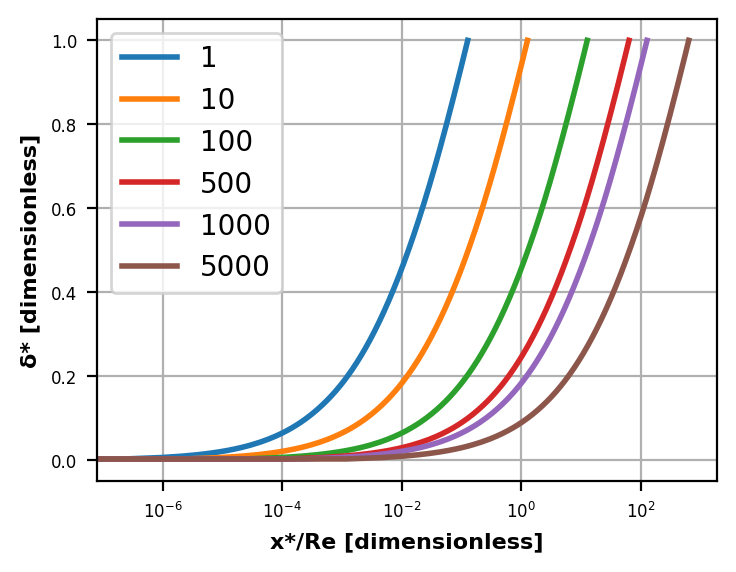

In [15]:
# Redefine Re in same function from before within a for loop.

### BEGIN SOLUTION
dspan = [0, 1] # range of normalized d*
Mult_Re = np.array([1, 10, 100, 500, 1000, 5000]) # values from above in array
n = 300 # number of steps in linspace below
tspan = np.linspace(0, 1, n)
xo = [0] # we're starting at the entrance of the tube
### END SOLUTION

fig = plt.figure(figsize=(4,3),dpi=200) # formats the plotted figure to be larger and clearer

# loop the integration for different values of Re
# plot each iteration inside loop

for i in range(len(Mult_Re)):

### BEGIN SOLUTION
    re = Mult_Re[i]
    e_Re_lambda = lambda x, d: entrance(x, d, Re = re)
    soln = integrate.solve_ivp(e_Re_lambda, dspan, xo, t_eval= tspan) #this is to solve our ode
    d = soln.t # d = independent variable
    x = soln.y[0] # x = dependent variable solution
   # Use semilogx
    plt.semilogx(x, d, linewidth=2, label = Mult_Re[i]) #we want the normalized x axis to see where d crosses 1.
    Le = np.array(x[n-1])
### END SOLUTION

    #print values for Le
print("\n")

# labels and publication quality details
plt.xlabel('x*/Re [dimensionless]', fontsize=8,fontweight='bold')
plt.ylabel('\u03B4* [dimensionless]', fontsize=8,fontweight='bold')
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.grid()
plt.legend();

#4. Air Tunnel example
Wind tunnels are devices used to test and study the aerodynamic properties of objects, such as aircraft, cars, buildings, and more. They work by creating a controlled flow of air over a model or prototype, simulating the conditions that the object would experience in the real world. Here's how a wind tunnel typically works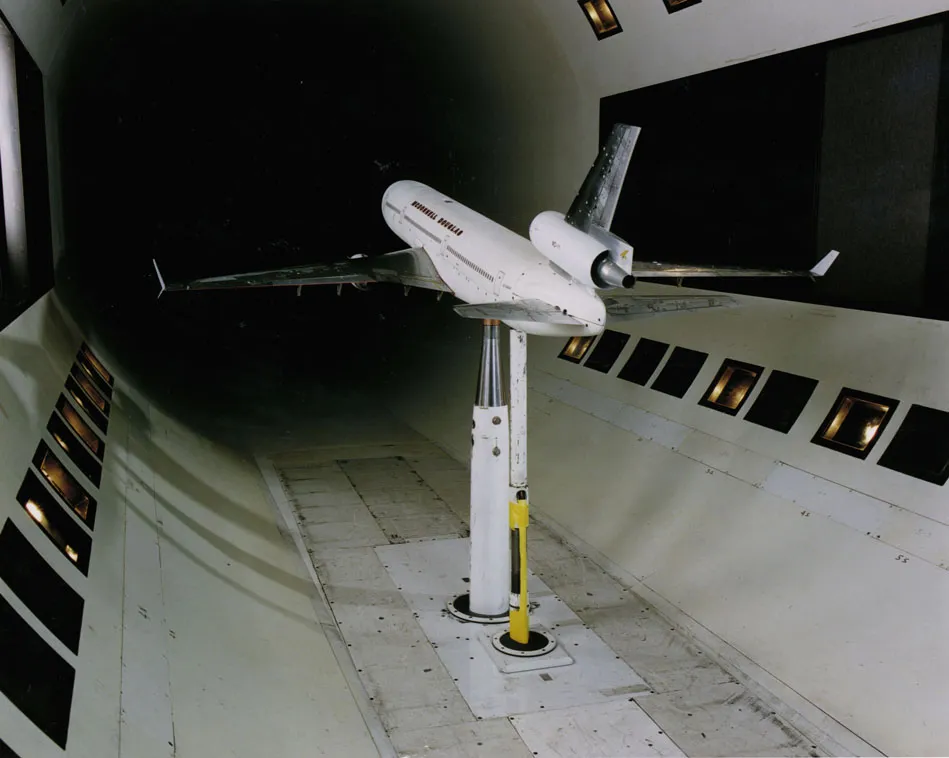

Calculating the entrance length is a critical aspect of wind tunnel testing, particularly in the context of aerodynamic research. Understanding and accurately determining the entrance length, which is the distance required for the flow to transition from an initially turbulent or non-uniform state to a fully developed, stable flow, is vital for ensuring the reliability and validity of aerodynamic measurements. It helps researchers establish a controlled and consistent testing environment by allowing them to place the object of interest in the fully developed flow region. This not only enhances the accuracy of aerodynamic data but also ensures that the testing conditions closely resemble those experienced by real-world objects, such as aircraft or vehicles, enabling engineers and scientists to make informed design decisions and improvements.


1 Let's explore a scenario with a wind tunnel that has a length of 200 meters and a diameter of 3 meters. If the wind is flowing in this tunnel at a velocity of 30 m/s and the air viscosity is given as 1.5×10−5 m²/s, the objective is to calculate the entrance length of this wind tunnel




1.   Find the Rynolds Number
\begin{equation}
Re=V*D/Viscosity,
\end{equation}
\begin{equation}
Re=30*1/1.5*{10^-5}
\end{equation}
2.   check if it is laminar or turbulent
\begin{equation}
Re>3500 terbulant
\end{equation}
\begin{equation}
Re<2000 laminar
\end{equation}
\begin{equation}
3500>Re>2000 Transition
\end{equation}
3.   use the coresponding equation if transition average it
2.   report the data






In [16]:
# Given values
wind_speed = 30  # m/s
tube_diameter = 3  # meters
air_viscosity = 1.5e-5  # m^2/s

# Calculate Reynolds number
Re = (wind_speed * tube_diameter) / air_viscosity

# Determine the flow regime
if Re < 2000:
    flow_regime = "Laminar"
    Le = 0.005 * Re * tube_diameter
    equation_used = "Le = 0.005 * Re * D"
elif Re > 3500:
    flow_regime = "Turbulent"
    Le = 4.4 * (Re ** (1/6)) * tube_diameter
    equation_used = "Le = 4.4 * (Re^1/6) * D"
else:
    flow_regime = "Transition"
    # For transition, use the average of laminar and turbulent equations
    Le_laminar = 0.005 * Re * tube_diameter
    Le_turbulent = 4.4 * (Re ** (1/6)) * tube_diameter
    Le = (Le_laminar + Le_turbulent) / 2
    equation_used = "Average of laminar and turbulent equations"

# Output the results
print(f"Reynolds number (Re) is {Re:.2f}, the flow is in the {flow_regime} regime.")
print(f"Entrance Length (Le) is {Le:.2f} meters, calculated using the equation: {equation_used}")


Reynolds number (Re) is 6000000.00, the flow is in the Turbulent regime.
Entrance Length (Le) is 177.94 meters, calculated using the equation: Le = 4.4 * (Re^1/6) * D


#5- water flow example
You have a water tank connected to a pipe with a diameter of 0.5 meters. Water flows out of the tank and into the pipe with an average velocity of 2 m/s. The kinematic viscosity of water is 1.004×10−6 m²/s. Draw the entrance length (Le) vs Water velocity.

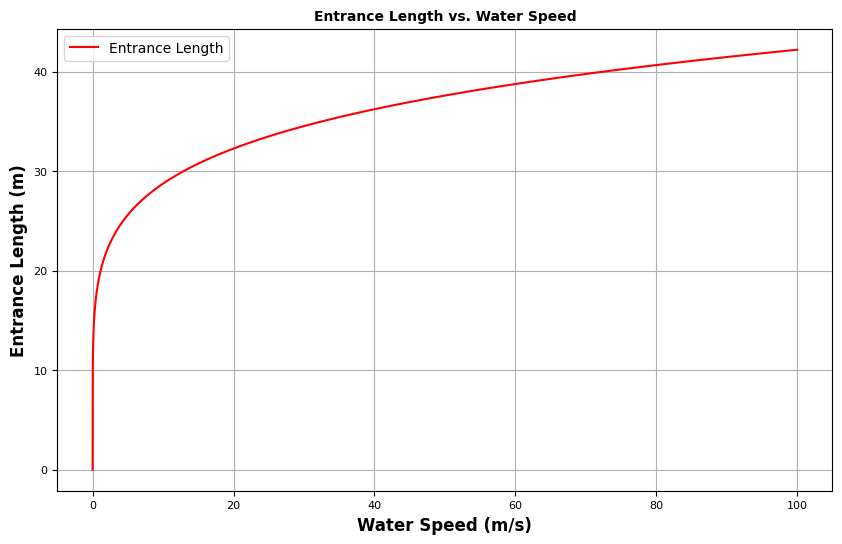

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Given values
pipe_diameter = 0.5  # meters
water_kinematic_viscosity = 1.004e-6  # m²/s

# Initialize lists to store data
speeds = np.arange(0, 100.01, 0.01)  # Water speeds from 0 to 100 m/s with a step of 0.01 m/s
entrance_lengths = []

# Calculate entrance lengths for different speeds
for speed in speeds:
    Re = (speed * pipe_diameter) / water_kinematic_viscosity
    if Re < 2000:
        Le = 0.05 * Re * pipe_diameter
    elif Re > 3500:
        Le = 4.4 * pipe_diameter * (Re ** (1/6))
    else:
        Le_laminar = 0.05 * Re * pipe_diameter
        Le_turbulent = 4.4 * pipe_diameter * (Re ** (1/6))
        Le = (Le_laminar + Le_turbulent) / 2
    entrance_lengths.append(Le)

# Create the plot for Entrance Length vs. Water Speed
plt.figure(figsize=(10, 6))
plt.plot(speeds, entrance_lengths, label='Entrance Length', color='r')
plt.xlabel('Water Speed (m/s)', fontsize=12, fontweight='bold')
plt.ylabel('Entrance Length (m)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(True)
plt.title('Entrance Length vs. Water Speed', fontsize=10, fontweight='bold')
plt.legend()

# Show the plot
plt.show()


As the speed of the water flow increases, the entrance length also exhibits a proportional increase, highlighting the direct relationship between flow velocity and the extent of the entrance region in the pipe. This observation underscores the significance of controlling the entrance length in understanding and optimizing fluid dynamics within the system.

**Reference**:

[1]Truskey, G. A., Yuan, F., & Katz, D. F. (2004). Transport phenomena in biological systems.

[2]Chaudhry, M. H. (2008). Open-channel flow (Vol. 523). New York: Springer.

